In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("train.csv")

Checking the number of unique customers

CustomerIds are not reliable. They don't point to one unique customer

There are many same Surnames too :| 

In [8]:
df.apply(lambda x: x.duplicated().sum())

id                      0
CustomerId         141813
Surname            162237
CreditScore        164577
Geography          165031
Gender             165032
Age                164963
Tenure             165023
Balance            134959
NumOfProducts      165030
HasCrCard          165032
IsActiveMember     165032
EstimatedSalary    109736
Exited             165032
dtype: int64

In [9]:
df.duplicated().sum()


0

In [10]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Let's have some EDAs

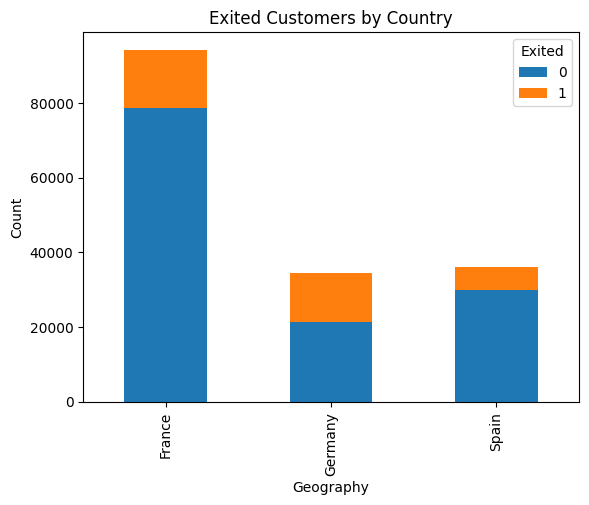

In [11]:
import matplotlib.pyplot as plt

# Group the data by 'Country' and calculate the count of 'Exited' values
country_exited_counts = df.groupby('Geography')['Exited'].value_counts().unstack().fillna(0)

# Plot the bar plot
country_exited_counts.plot(kind='bar', stacked=True)
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Exited Customers by Country')
plt.legend(title='Exited')
plt.show()

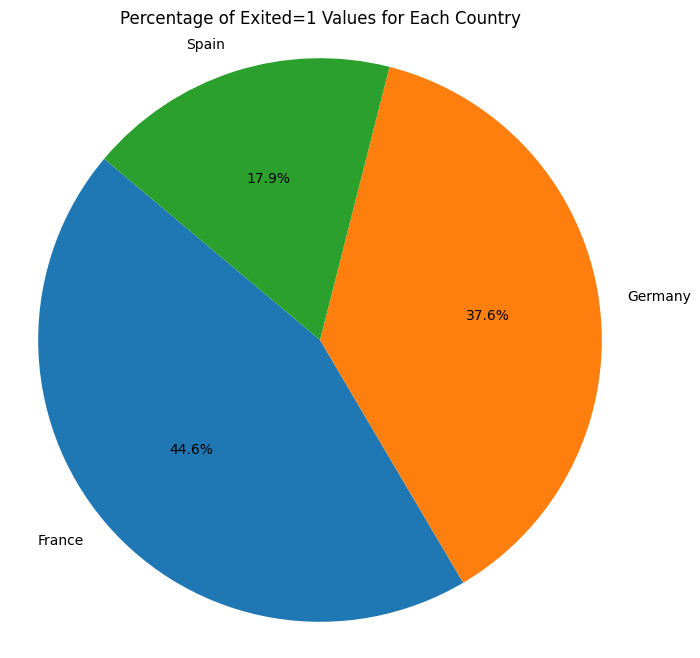

In [12]:
# Filter the DataFrame to include only rows where 'Exited' is equal to 0
zero_exited_data = df[df['Exited'] == 1]

# Group the filtered data by the 'Geography' column and count occurrences
country_counts = zero_exited_data.groupby('Geography').size()

# Calculate the percentage of 0 values for each country
percentage_zero_values = (country_counts / country_counts.sum()) * 100

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(percentage_zero_values, labels=percentage_zero_values.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Exited=1 Values for Each Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

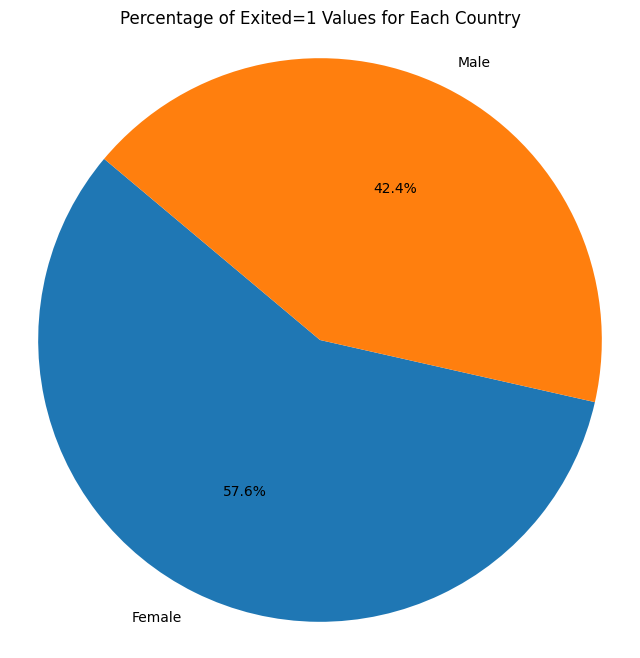

In [13]:
# Filter the DataFrame to include only rows where 'Exited' is equal to 0
zero_exited_data = df[df['Exited'] == 1]

# Group the filtered data by the 'Geography' column and count occurrences
country_counts = zero_exited_data.groupby('Gender').size()

# Calculate the percentage of 0 values for each country
percentage_zero_values = (country_counts / country_counts.sum()) * 100

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(percentage_zero_values, labels=percentage_zero_values.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Exited=1 Values for Each Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

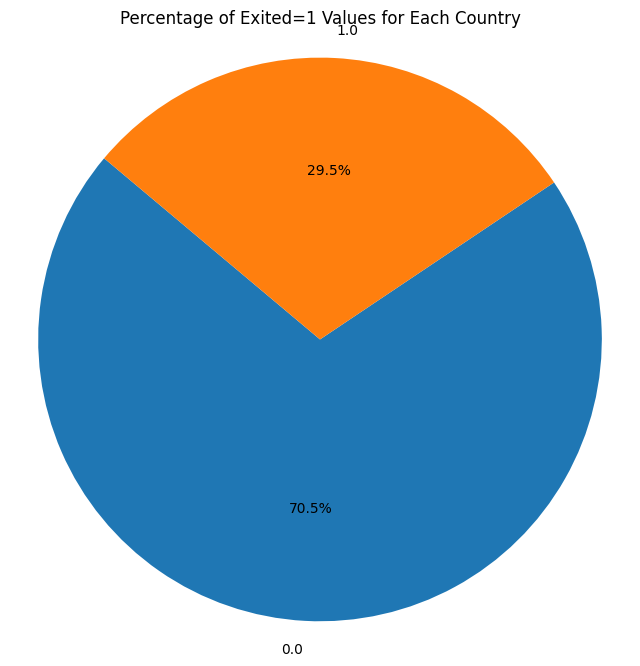

In [14]:
# Filter the DataFrame to include only rows where 'Exited' is equal to 0
zero_exited_data = df[df['Exited'] == 1]

# Group the filtered data by the 'Geography' column and count occurrences
country_counts = zero_exited_data.groupby('IsActiveMember').size()

# Calculate the percentage of 0 values for each country
percentage_zero_values = (country_counts / country_counts.sum()) * 100

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(percentage_zero_values, labels=percentage_zero_values.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Exited=1 Values for Each Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

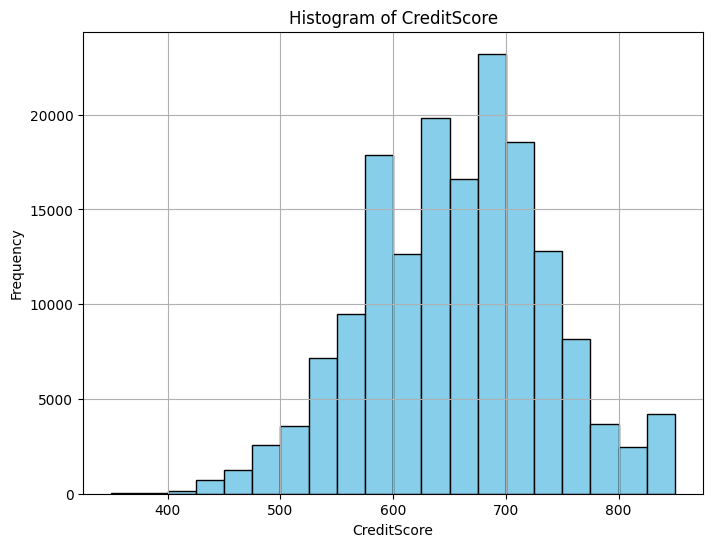

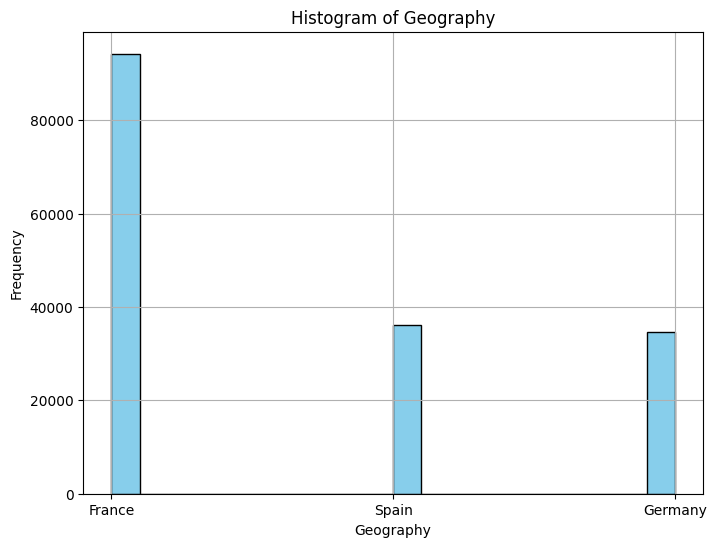

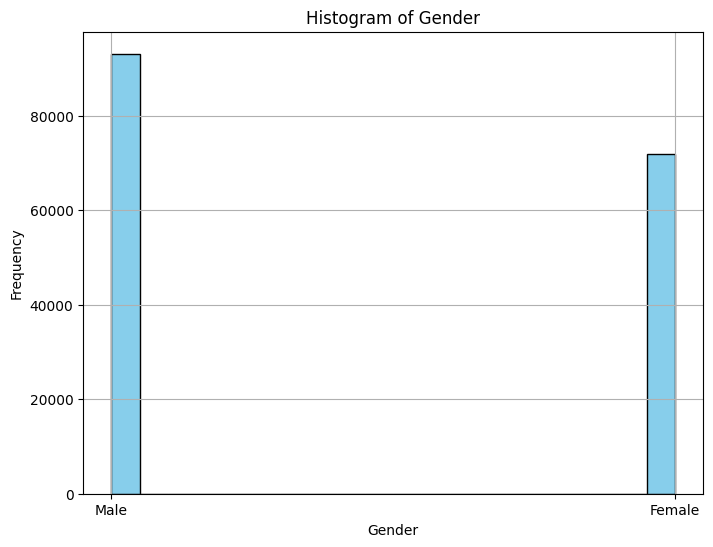

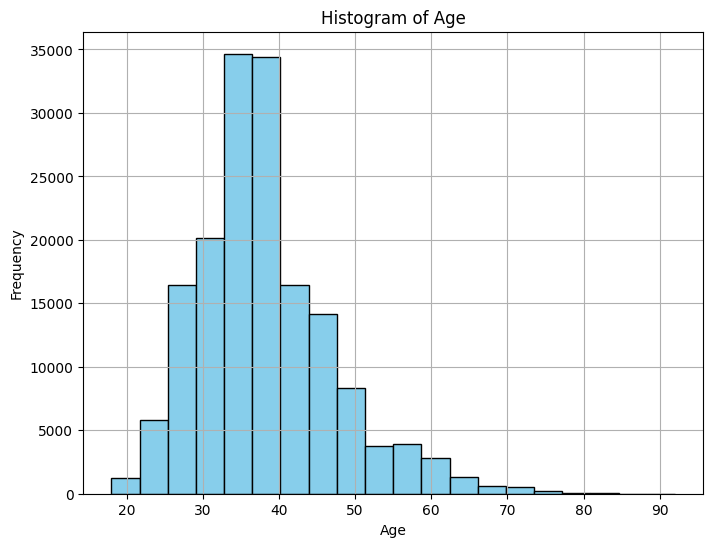

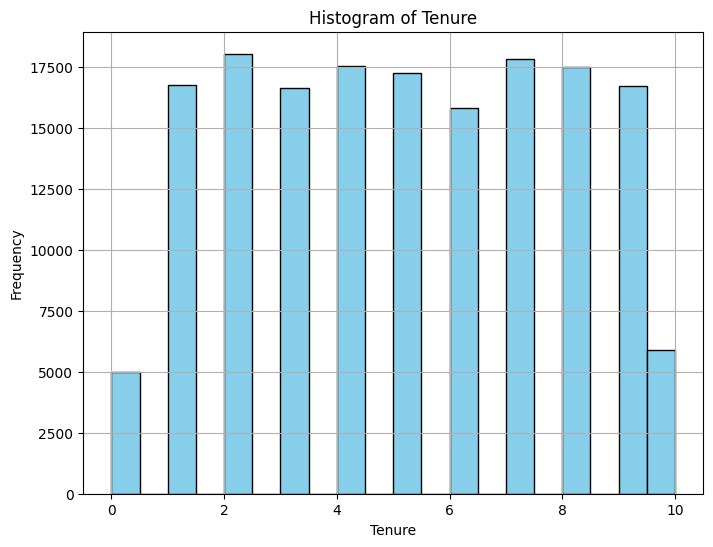

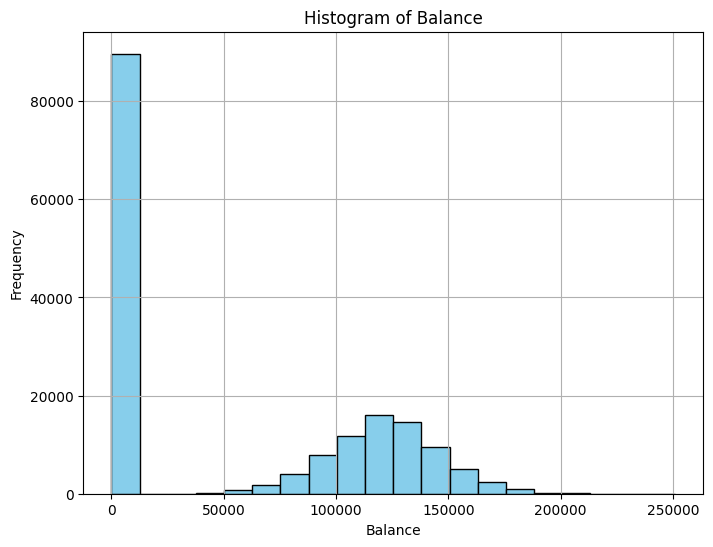

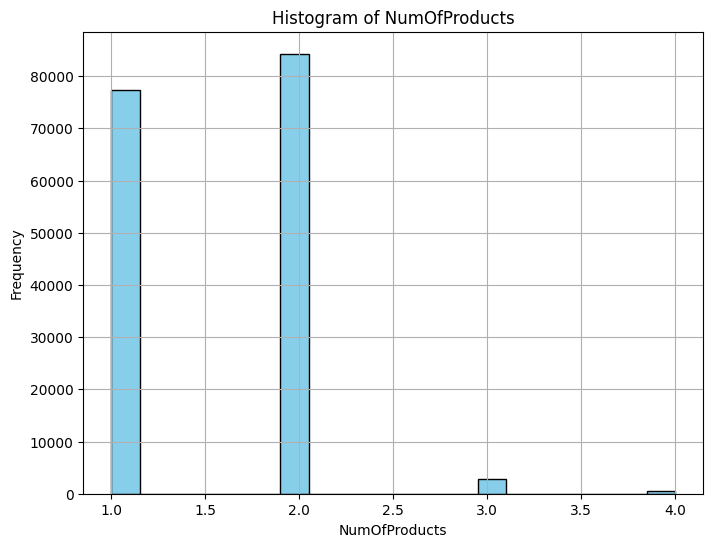

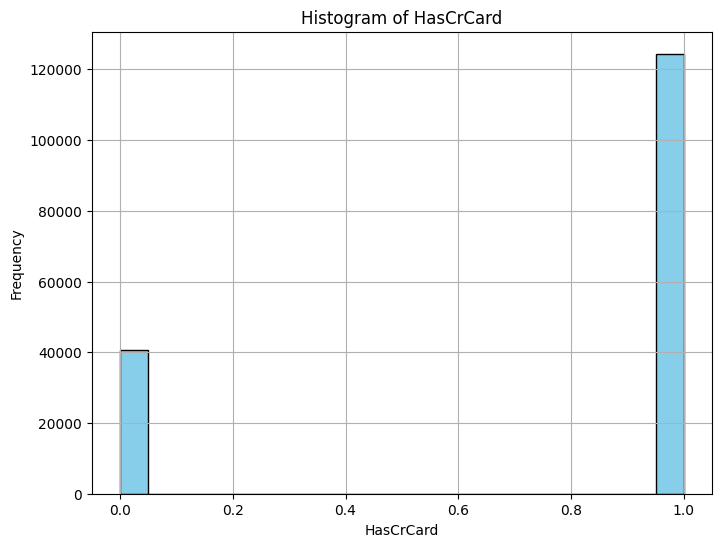

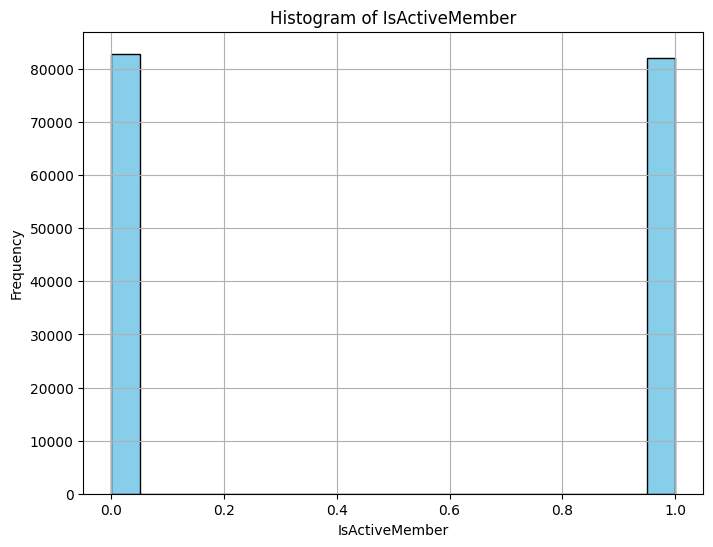

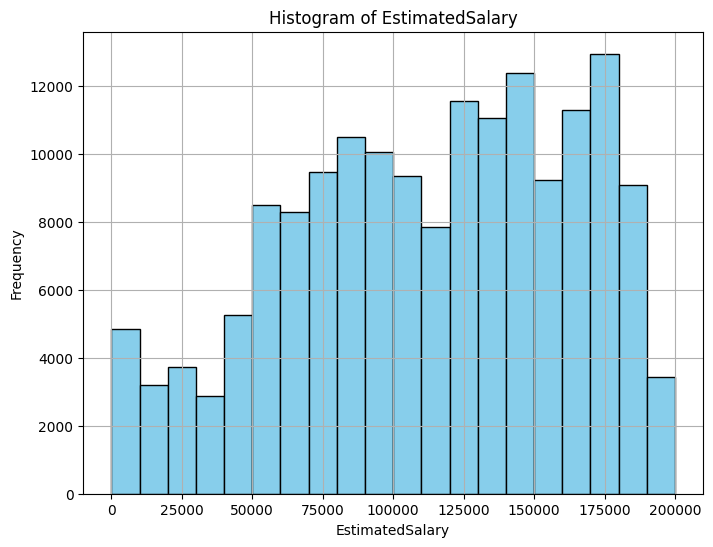

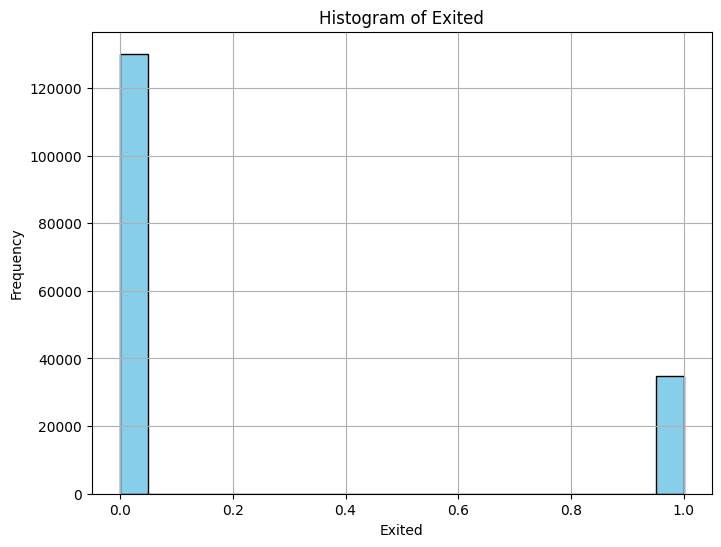

In [15]:
# Plot histograms for all columns
for column in df.columns:
    if column in ['id',	'CustomerId',	"Surname"]:
        continue
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [16]:
X = pd.DataFrame(df, columns=["CreditScore"	,"Geography"	,"Gender"	,"Age"	,"Tenure"	,"Balance"	,"NumOfProducts"	,"HasCrCard"	,"IsActiveMember"	,"EstimatedSalary"])
y = pd.DataFrame(df, columns=["Exited"])


In [17]:
X = pd.get_dummies(X, columns=["Gender", "Geography"])
X = X.astype(int)

In [18]:
# Concatenate X and y along the columns axis
merged_df = pd.concat([X, y], axis=1)

# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Extract the correlation of features with the target column
target_correlation = correlation_matrix['Exited']

# Print the correlation of features with the target column
print(target_correlation)

CreditScore         -0.027383
Age                  0.340768
Tenure              -0.019565
Balance              0.129743
NumOfProducts       -0.214554
HasCrCard           -0.022141
IsActiveMember      -0.210237
EstimatedSalary      0.018827
Gender_Female        0.146442
Gender_Male         -0.146442
Geography_France    -0.130797
Geography_Germany    0.211054
Geography_Spain     -0.051175
Exited               1.000000
Name: Exited, dtype: float64


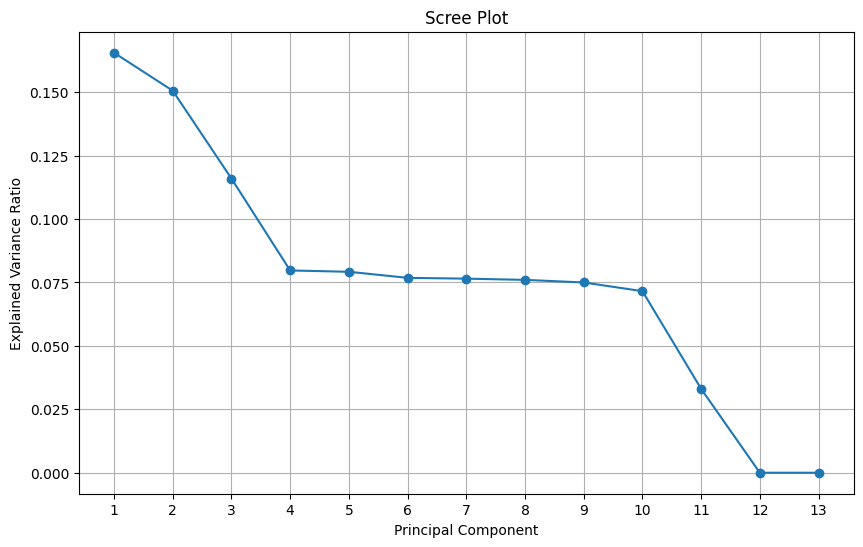

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X is your DataFrame

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

In [20]:
# Assuming pca is your PCA object and X is your DataFrame

# Get the absolute values of the principal components
abs_components = np.abs(pca.components_)

# Find the index of the feature with the highest absolute value in each principal component
max_feature_index = abs_components.argmax(axis=1)

# Get the corresponding column names
column_names = X.columns[max_feature_index]

# Print the corresponding column names for each principal component
for i, component in enumerate(pca.components_):
    print(f"Principal Component {i+1}: Corresponding Column Name = {column_names[i]}")


Principal Component 1: Corresponding Column Name = Geography_Germany
Principal Component 2: Corresponding Column Name = Gender_Female
Principal Component 3: Corresponding Column Name = Geography_Spain
Principal Component 4: Corresponding Column Name = Age
Principal Component 5: Corresponding Column Name = CreditScore
Principal Component 6: Corresponding Column Name = Tenure
Principal Component 7: Corresponding Column Name = Tenure
Principal Component 8: Corresponding Column Name = CreditScore
Principal Component 9: Corresponding Column Name = IsActiveMember
Principal Component 10: Corresponding Column Name = Age
Principal Component 11: Corresponding Column Name = Balance
Principal Component 12: Corresponding Column Name = Geography_France
Principal Component 13: Corresponding Column Name = Gender_Male


In [21]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)


In [24]:
X_pca = pd.DataFrame(X_pca, columns=['Geography_Germany', 'Gender_Female', 'Geography_Spain', 'Age', 'CreditScore' ,'Tenure', 'Tenure2', 'CreditScore' ,'IsActiveMember'])

In [25]:
merged_df = pd.concat([X_pca, y], axis=1)


In [ ]:
# # Separate the data into two groups based on the value of the "Exit" column
# minority_class = merged_df[merged_df['Exited'] == 0]
# majority_class = merged_df[merged_df['Exited'] == 1]

# # Determine the minority class
# if len(minority_class) > len(majority_class):
#     minority_class, majority_class = majority_class, minority_class

# # Sample from the majority class to create a balanced dataset
# majority_class_sampled = majority_class.sample(n=len(minority_class), replace=False, random_state=42)

# # Concatenate the balanced dataset with the minority class
# balanced_df = pd.concat([majority_class_sampled, minority_class])

# # Shuffle the rows
# balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# # Now, balanced_df contains a balanced dataset with equal counts of both classes

In [29]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score

# Define the number of folds for K-fold CV
n_splits = 5

# Initialize the Stratified K-fold CV splitter
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Initialize a list to store performance metrics (e.g., accuracy) for each fold
performance_metrics = []

# Iterate over the K folds
for train_index, val_index in skf.split(X_pca, y):
    # Split the data into training and validation sets for this fold
    X_train, X_val = X_pca.iloc[train_index], X_pca.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Apply undersampling to the training set
    X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)

In [35]:
X_pca["NewF"] = X_pca["Tenure2"]
X_pca= X_pca.drop("Tenure2", axis=1)

,Geography_Germany,Gender_Female,Geography_Spain,Age,CreditScore,Tenure,CreditScore,IsActiveMember,NewF
0,-1.920975,0.227158,-0.411262,-1.285893,-0.343888,-1.414609,-0.488402,-0.417334,-0.108345
1,-2.060955,0.264082,-0.277817,0.480550,0.650449,-0.325300,0.796897,0.602329,-1.862934
2,-1.840848,0.238898,-0.426519,-1.619445,-0.629022,0.363029,-0.699725,0.147033,1.546214
3,-0.541277,1.155748,-1.371910,0.926137,-0.436735,-0.450599,0.406935,0.750845,-0.943951
4,-1.028676,1.078950,2.601565,0.313978,0.931931,1.319358,0.015755,0.436153,-1.444961
...,...,...,...,...,...,...,...,...,...
165029,0.930067,-1.139913,2.240113,0.506237,-0.066288,-0.933964,-0.736614,0.640390,-0.491270
165030,-1.410847,0.478746,-0.745144,0.807757,0.446981,-0.504595,-1.332206,-2.394241,0.442250
165031,-1.658140,0.483270,-0.710626,0.178451,-0.618783,-0.368686,0.471172,1.009941,0.199458
165032,2.033269,-0.394361,1.648918,1.414899,-0.044386,0.721349,1.538416,-0.449415,1.073006


,Geography_Germany,Gender_Female,Geography_Spain,Age,CreditScore,Tenure,CreditScore,IsActiveMember,NewF
0,-1.920975,0.227158,-0.411262,-1.285893,-0.343888,-1.414609,-0.488402,-0.417334,-0.108345
1,-2.060955,0.264082,-0.277817,0.480550,0.650449,-0.325300,0.796897,0.602329,-1.862934
2,-1.840848,0.238898,-0.426519,-1.619445,-0.629022,0.363029,-0.699725,0.147033,1.546214
3,-0.541277,1.155748,-1.371910,0.926137,-0.436735,-0.450599,0.406935,0.750845,-0.943951
4,-1.028676,1.078950,2.601565,0.313978,0.931931,1.319358,0.015755,0.436153,-1.444961
...,...,...,...,...,...,...,...,...,...
165029,0.930067,-1.139913,2.240113,0.506237,-0.066288,-0.933964,-0.736614,0.640390,-0.491270
165030,-1.410847,0.478746,-0.745144,0.807757,0.446981,-0.504595,-1.332206,-2.394241,0.442250
165031,-1.658140,0.483270,-0.710626,0.178451,-0.618783,-0.368686,0.471172,1.009941,0.199458
165032,2.033269,-0.394361,1.648918,1.414899,-0.044386,0.721349,1.538416,-0.449415,1.073006


In [50]:
X_pca = X_pca.loc[:,~X_pca.columns.duplicated()]
X_pca

,Geography_Germany,Gender_Female,Geography_Spain,Age,CreditScore,Tenure,IsActiveMember,NewF
0,-1.920975,0.227158,-0.411262,-1.285893,-0.343888,-1.414609,-0.417334,-0.108345
1,-2.060955,0.264082,-0.277817,0.480550,0.650449,-0.325300,0.602329,-1.862934
2,-1.840848,0.238898,-0.426519,-1.619445,-0.629022,0.363029,0.147033,1.546214
3,-0.541277,1.155748,-1.371910,0.926137,-0.436735,-0.450599,0.750845,-0.943951
4,-1.028676,1.078950,2.601565,0.313978,0.931931,1.319358,0.436153,-1.444961
...,...,...,...,...,...,...,...,...
165029,0.930067,-1.139913,2.240113,0.506237,-0.066288,-0.933964,0.640390,-0.491270
165030,-1.410847,0.478746,-0.745144,0.807757,0.446981,-0.504595,-2.394241,0.442250
165031,-1.658140,0.483270,-0.710626,0.178451,-0.618783,-0.368686,1.009941,0.199458
165032,2.033269,-0.394361,1.648918,1.414899,-0.044386,0.721349,-0.449415,1.073006


In [52]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score

# Define the number of folds for K-fold CV
n_splits = 5

# Initialize the Stratified K-fold CV splitter
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Initialize a list to store performance metrics (e.g., AUC) for each fold
performance_metrics = []

# Initialize XGBoost classifier without specifying feature_names
xgb_classifier = xgb.XGBClassifier()

# Iterate over the K folds
for train_index, val_index in skf.split(X_pca, y):
    # Split the data into training and validation sets for this fold
    X_train, X_val = X_pca.iloc[train_index], X_pca.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train = X_train.loc[:,~X_train.columns.duplicated()]
    y_train = y_train.loc[:,~y_train.columns.duplicated()]
    X_val = X_val.loc[:,~X_val.columns.duplicated()]
    y_val = y_val.loc[:,~y_val.columns.duplicated()]
    # Apply undersampling to the training set
    X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)
    
    # Train the classifier on the resampled training data
    xgb_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the validation data
    y_pred_proba = xgb_classifier.predict_proba(X_val)[:, 1]  # Get probability estimates for the positive class
    
    # Evaluate the model performance using AUC
    auc = roc_auc_score(y_val, y_pred_proba)
    performance_metrics.append(auc)

# Print the mean AUC across all folds
print("Mean AUC:", sum(performance_metrics) / len(performance_metrics))


Mean AUC: 0.8719297527638448


In [58]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression classifier
logistic_classifier = LogisticRegression()

# Initialize a list to store performance metrics (e.g., AUC) for each fold
performance_metrics = []

# Iterate over the K folds
for train_index, val_index in skf.split(X_pca, y):
    # Split the data into training and validation sets for this fold
    X_train, X_val = X_pca.iloc[train_index], X_pca.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Apply undersampling to the training set
    X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)
    
    # Convert y to a 1D array using .values.ravel()
    y_train_resampled = y_train_resampled.values.ravel()

    # Train the classifier on the resampled training data
    logistic_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the validation data
    y_pred_proba = logistic_classifier.predict_proba(X_val)[:, 1]  # Get probability estimates for the positive class
    
    # Evaluate the model performance using AUC
    auc = roc_auc_score(y_val, y_pred_proba)
    performance_metrics.append(auc)

# Print the mean AUC across all folds
print("Mean AUC:", sum(performance_metrics) / len(performance_metrics))


Mean AUC: 0.7787181048581242


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid
param_grid = {
    'dual': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'C': [0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'intercept_scaling': [0.1, 1.0, 10.0],
    'class_weight': [None, 'balanced'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'random_state': [42]
}
# Initialize Logistic Regression classifier
logistic_classifier = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid, cv=5, scoring='roc_auc')

# Initialize a list to store performance metrics (e.g., AUC) for each fold
performance_metrics = []

# Iterate over the K folds
for train_index, val_index in skf.split(X_pca, y):
    # Split the data into training and validation sets for this fold
    X_train, X_val = X_pca.iloc[train_index], X_pca.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Apply undersampling to the training set
    X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)
    # Convert y to a 1D array using .values.ravel()
    y_train_resampled = y_train_resampled.values.ravel()
    # Perform grid search on the resampled training data
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    # Get the best model from grid search
    best_model = grid_search.best_estimator_
    
    # Make predictions on the validation data
    y_pred_proba = best_model.predict_proba(X_val)[:, 1]  # Get probability estimates for the positive class
    
    # Evaluate the model performance using AUC
    auc = roc_auc_score(y_val, y_pred_proba)
    performance_metrics.append(auc)

# Print the mean AUC across all folds
print("Mean AUC:", sum(performance_metrics) / len(performance_metrics))


c:\Users\Lenovo\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\Lenovo\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\Lenovo\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\Lenovo\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: T

Mean AUC: 0.7787769225000881
